## Data Preparation
#### First we analyze the data:
1. Search for missing values
2. Check dataset balance
#### Then we use NLP techniques such as:
1. Stemming
2. Tokenization
3. Stop-word removal

In [12]:
# Imports
import pandas as pd
import seaborn as sns
import nltk

from phrase_breaker import phrase_breaker

## Data Analysis

In [13]:
# Import the data onto dataframe
data = pd.read_csv("../reviews.csv", names=["Review Text", "Stars", "Polarity"])
data

,Review Text,Stars,Polarity
0,This is an extremely basic course. Machine lea...,1,negative
1,The course is ok but the certification procedu...,1,negative
2,"I just started week 3 , I have to admit that I...",1,negative
3,Have to give a star so I will give it one. Ot...,1,negative
4,"However good the material and lectures may be,...",1,negative
...,...,...,...
12509,it was pretty useful to rookie who wants to st...,5,positive
12510,Great course clear and easy to follow. Mento...,5,positive
12511,Very informative and condensed course. A lot o...,5,positive
12512,"This is an awesome course, the instructor is v...",5,positive


In [14]:
# Look for null values
data.isnull().values.any()

False

<AxesSubplot:xlabel='Polarity', ylabel='count'>

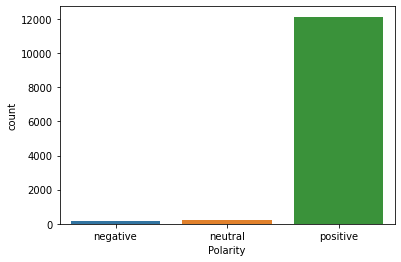

In [15]:
# Check dataset balance
sns.countplot(x="Polarity", data=data)

In [16]:
# Creating dataframe with original vocabulary (existent words)
# Mainly for performance evaluation purposes

original = set()
data["Review Text"].str.split().apply(original.update)

original_data = {
    'Number of Words': [len(list(original))],
    'Type': ["original"],
}

pf_df = pd.DataFrame(original_data)
pf_df

,Number of Words,Type
0,28220,original


## Data Preparation

In [17]:
# Applying phrase breaker to reviews
data["Review Text"] = data["Review Text"].apply(phrase_breaker)
data["Review Text"].head()

0    This is an extremely basic course. Machine lea...
1    The course is ok but the certification procedu...
2    I just started week 3 , I have to admit that I...
3    Have to give a star so I will give it one. Oth...
4    However good the material and lectures may be,...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

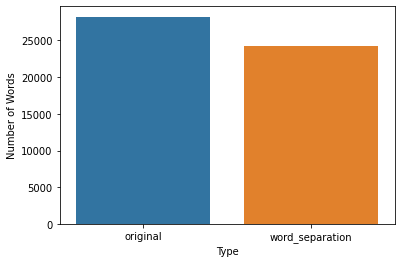

In [18]:
# Evaluate the decrease in complexity levels after separating every word in every review
word_sep = set()
data["Review Text"].str.split().apply(word_sep.update)

word_sep_data = {
    'Number of Words': len(list(word_sep)),
    'Type': "word_separation",
}

pf_df = pf_df.append(word_sep_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [19]:
# All review text is transformed into lower case
data["Review Text"] = data["Review Text"].str.lower()
data["Review Text"].head()

0    this is an extremely basic course. machine lea...
1    the course is ok but the certification procedu...
2    i just started week 3 , i have to admit that i...
3    have to give a star so i will give it one. oth...
4    however good the material and lectures may be,...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

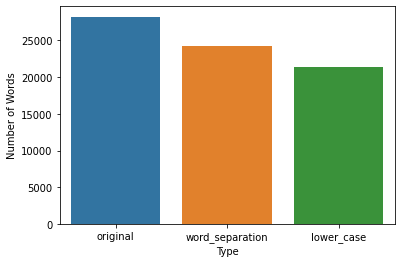

In [20]:
# Evaluate the decrease in complexity levels after lower casing every review
lower_case = set()
data["Review Text"].str.split().apply(lower_case.update)

lower_case_data = {
    'Number of Words': len(list(lower_case)),
    'Type': "lower_case",
}

pf_df = pf_df.append(lower_case_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [21]:
data["Review Text"] = data["Review Text"].apply(nltk.word_tokenize)
data["Review Text"].head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\VER2BRG/nltk_data'
    - 'C:\\Users\\VER2BRG\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'C:\\Users\\VER2BRG\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'C:\\Users\\VER2BRG\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\VER2BRG\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
